In [109]:
import pandas as pd
import numpy as np
import scipy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('./data/train.csv', index_col = 'Id')
test = pd.read_csv('./data/test.csv', index_col = 'Id')

In [4]:
df1 = train.copy()
df2 = test.copy()

In [5]:
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# ## LOOK AT THIS
# print(df1.columns[0:22]) # hyelee
# print(df1.columns[22:41]) # alyssa
# print(df1.columns[41:57]) # kisoo
# print(df1.columns[57:]) # wonchan

In [8]:
df1[df1.PoolQC.isnull() == 0] # only 7 rows and probably could say pool or no pool since they are about same quality

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,Inside,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,Inside,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,Inside,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


In [9]:
df1.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
df_target = train[df1.columns[79]]

In [79]:
df_w = train[df1.columns[57:]]
df_w.head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [94]:
pd.DataFrame({'count':df_w.count(),'unique count':df_w.nunique(),'null count':df_w.isnull().sum()})

,count,unique count,null count
GarageYrBlt,1379,97,81
GarageType,1460,7,0
GarageFinish,1460,4,0
GarageCars,1460,5,0
GarageArea,1460,441,0
GarageQual,1460,6,0
GarageCond,1460,6,0
PavedDrive,1460,3,0
WoodDeckSF,1460,274,0
OpenPorchSF,1460,202,0


In [126]:
df_w.head()

,GarageYrBlt,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,2003.0,Attchd,RFn,2,548,TA,TA,Y,0,61,...,0,No,No,No,0,2,2008,WD,Normal,208500
2,1976.0,Attchd,RFn,2,460,TA,TA,Y,298,0,...,0,No,No,No,0,5,2007,WD,Normal,181500
3,2001.0,Attchd,RFn,2,608,TA,TA,Y,0,42,...,0,No,No,No,0,9,2008,WD,Normal,223500
4,1998.0,Detchd,Unf,3,642,TA,TA,Y,0,35,...,0,No,No,No,0,2,2006,WD,Abnorml,140000
5,2000.0,Attchd,RFn,3,836,TA,TA,Y,192,84,...,0,No,No,No,0,12,2008,WD,Normal,250000


In [177]:
# what to do with null values
# GarageType = No
# GarageYrBlt = May impute using house year built
# GarageFinish = No
# GarageQual = No
# GarageCond = No
# PoolQC = No
# Fence = No
# MiscFeature = No
df_yr = df_w.loc[:,['GarageYrBlt']]
df_rest = df_w.loc[:,df_w.columns != 'GarageYrBlt'].fillna(value='NA')
df_w = df_yr.join(df_rest)

# for the garage year built, the year is not present because there is no garage

In [178]:
# check df to see how many years are same for garage year and year built
df_check = df1.iloc[df_w[df_w.GarageYrBlt.isnull() == 0].loc[:,['GarageYrBlt']].index-1]
df_check = df_check.loc[:,['GarageYrBlt', 'YearBuilt']]
df_check['GarageYrBlt'] = df_check['GarageYrBlt'].astype('int64')

In [179]:
# total number of non-nas compared to how many are same
pd.DataFrame({'count':df_check.count(),
             'count_same':sum(df_check['GarageYrBlt']==df_check['YearBuilt'])})

,count,count_same
GarageYrBlt,1379,1089
YearBuilt,1379,1089


In [190]:
print(np.mean(df_check['GarageYrBlt']-df_check['YearBuilt']))
df_check[df_check['GarageYrBlt']!=df_check['YearBuilt']]
# 1377 index is a bit odd

5.547498187092096


,GarageYrBlt,YearBuilt
Id,,
4,1998,1915
16,1991,1929
27,2005,1951
28,2008,2007
30,1920,1927
37,1995,1994
44,1977,1975
52,1985,1934
55,1962,1955


In [189]:
df_check[df_check['GarageYrBlt'] < df_check['YearBuilt']]

,GarageYrBlt,YearBuilt
Id,,
30,1920,1927
94,1900,1910
325,1961,1967
601,2003,2005
737,1949,1950
1104,1954,1959
1377,1925,1930
1415,1922,1923
1419,1962,1963


In [159]:
df_w[df_w.GarageYrBlt.isnull() == 1].loc[:,['GarageYrBlt']].index

Int64Index([  40,   49,   79,   89,   90,  100,  109,  126,  128,  141,  149,
             156,  164,  166,  199,  211,  242,  251,  288,  292,  308,  376,
             387,  394,  432,  435,  442,  465,  496,  521,  529,  534,  536,
             563,  583,  614,  615,  621,  636,  637,  639,  650,  706,  711,
             739,  751,  785,  827,  844,  922,  943,  955,  961,  969,  971,
             977, 1010, 1012, 1031, 1039, 1097, 1124, 1132, 1138, 1144, 1174,
            1180, 1219, 1220, 1235, 1258, 1284, 1324, 1326, 1327, 1338, 1350,
            1408, 1450, 1451, 1454],
           dtype='int64', name='Id')

In [162]:
df_yrblt = df1.iloc[df_w[df_w.GarageYrBlt.isnull() == 1].loc[:,['GarageYrBlt']].index-1]
df_yrblt.loc[:,['GarageYrBlt', 'YearBuilt']]

,GarageYrBlt,YearBuilt
Id,,
40,NaN,1955
49,NaN,1920
79,NaN,1968
89,NaN,1915
90,NaN,1994
100,NaN,1959
109,NaN,1919
126,NaN,1935
128,NaN,1930


In [181]:
df_w[df_w.GarageYrBlt.isnull() == 0].describe()

,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.00000
mean,1978.506164,1.870921,500.762146,97.456853,47.276287,21.039159,3.609862,15.945613,2.920957,42.889050,6.334300,2007.812183,185479.51124
std,24.689725,0.630055,185.680520,126.699192,65.210465,60.535107,30.154682,57.249593,41.335545,501.613931,2.696674,1.330221,79023.89060
min,1900.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.00000
25%,1961.000000,1.000000,380.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,134000.00000
50%,1980.000000,2.000000,484.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,167500.00000
75%,2002.000000,2.000000,580.000000,171.000000,69.500000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,217750.00000
max,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.00000


In [182]:
df_w[df_w.GarageYrBlt.isnull() == 1].describe()

,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,0.0,81.0,81.0,81.000000,81.000000,81.000000,81.0,81.0,81.0,81.000000,81.000000,81.000000,81.000000
mean,NaN,0.0,0.0,39.555556,36.172840,37.530864,0.0,0.0,0.0,53.703704,6.111111,2007.876543,103317.283951
std,NaN,0.0,0.0,82.426179,81.820045,68.891234,0.0,0.0,0.0,393.365112,2.828427,1.297909,32815.023389
min,NaN,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,2006.000000,34900.000000
25%,NaN,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,4.000000,2007.000000,82500.000000
50%,NaN,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,6.000000,2008.000000,100000.000000
75%,NaN,0.0,0.0,32.000000,30.000000,30.000000,0.0,0.0,0.0,0.000000,8.000000,2009.000000,124000.000000
max,NaN,0.0,0.0,352.000000,523.000000,286.000000,0.0,0.0,0.0,3500.000000,12.000000,2010.000000,200500.000000


In [183]:
df_w_null = df_w[df_w.GarageYrBlt.isnull() == 1]
pd.DataFrame({'SaleType':df_w_null.SaleType.value_counts()})

,SaleType
WD,73
New,2
ConLD,2
Oth,2
ConLI,1
ConLw,1


In [184]:
pd.DataFrame({'SaleCondition':df_w_null.SaleCondition.value_counts()})

,SaleCondition
Normal,61
Abnorml,14
AdjLand,3
Partial,2
Alloca,1


In [201]:
df_w[df_w.GarageYrBlt.isnull() == 1]['GarageYrBlt'] = df_yrblt.loc[:,'YearBuilt'] + 5

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [202]:
df_w[df_w.GarageYrBlt.isnull() == 1]

,GarageYrBlt,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
40,NaN,No,No,0,0,No,No,N,0,0,...,0,No,No,No,0,6,2008,WD,AdjLand,82000
49,NaN,No,No,0,0,No,No,N,0,0,...,0,No,No,No,0,6,2009,New,Partial,113000
79,NaN,No,No,0,0,No,No,Y,0,0,...,0,No,No,No,0,4,2010,WD,Normal,136500
89,NaN,No,No,0,0,No,No,N,0,0,...,0,No,MnPrv,No,0,10,2009,ConLD,Abnorml,85000
90,NaN,No,No,0,0,No,No,Y,0,0,...,0,No,No,No,0,8,2007,WD,Normal,123600
100,NaN,No,No,0,0,No,No,Y,352,0,...,0,No,No,Shed,400,1,2010,WD,Normal,128950
109,NaN,No,No,0,0,No,No,N,0,0,...,0,No,No,No,0,8,2007,WD,Normal,115000
126,NaN,No,No,0,0,No,No,N,53,0,...,0,No,No,No,0,6,2006,WD,Normal,84500
128,NaN,No,No,0,0,No,No,N,0,0,...,0,No,No,No,0,6,2007,WD,Normal,87000


In [95]:
df_w = df_w.astype({'GarageYrBlt':int})

ValueError: Cannot convert non-finite values (NA or inf) to integer

<BarContainer object of 6 artists>

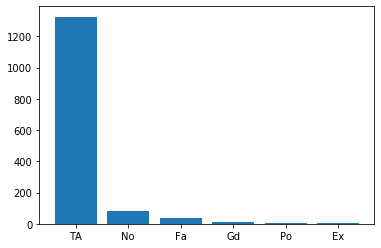

In [203]:
# df_w.groupby('GarageCond')['GarageCond'].count().sort_values(ascending=False).plot(kind='bar')
# plt.bar(df_w.loc[:,'GarageCond'].value_counts().index, df_w.loc[:,'GarageCond'].value_counts())

#### use this function to check out each category by itself
def plt_cat(cat):
    return plt.bar(df_w.loc[:,cat].value_counts().index, df_w.loc[:,cat].value_counts())
# plt_cat('GarageCond')

In [145]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
# plt.legend('GarageYrBlt')

# df_w['GarageYrBlt'].hist(ax=axes[0,0], label = 'GarageYrBlt').set_title('GarageYrBlt')
# df_w['GarageCars'].hist(ax=axes[0,1], label = 'GarageCars').set_title('GarageCars')

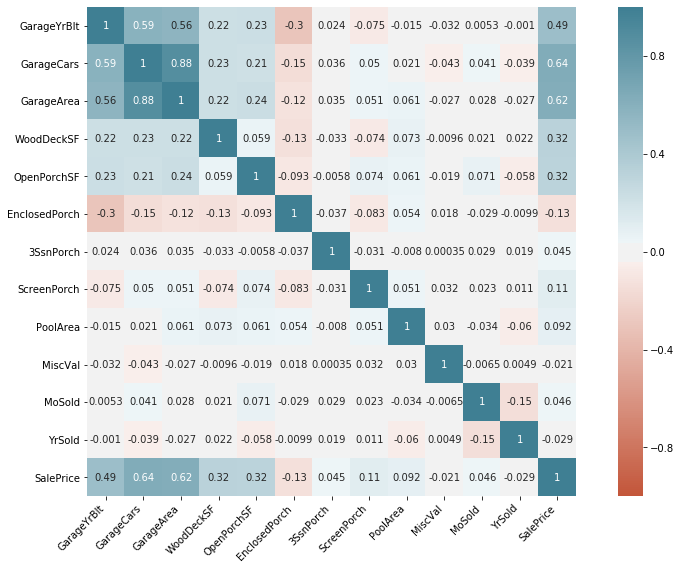

In [125]:
corr = df_w.corr()
plt.figure(figsize=(15, 9))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=256),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);